<h1 style='color: #C9C9C9'>Machine Learning with Python<img style="float: right; margin-top: 0;" width="240" src="../../Images/cf-logo.png" /></h1> 
<p style='color: #C9C9C9'>&copy; Coding Fury 2022 - all rights reserved</p>

<hr style='color: #C9C9C9' />

# What is Logistic Regression? 

Logistic Regression is used when the target variable can be one of 2 outcomes: True or False

For example, Logistic Regression could be used to determine if an email was spam or not spam. Or it could be used to determine if someone has a particular disease based on a range of factors. 


In this tutorial we're going to predict if a patient has diabetes or not. 


# The Diabetes Dataset

The Diabetes Dataset has 8 features
1. Pregnancies: the number of times the patient has been pregnant
1. Glucose : blood glucose levels from a glucose tolerance test
1. BloodPressure : diastolic blood pressure values (mm Hg)
1. SkinThickness : triceps skin fold thickness (mm)
1. Insulin : levels of insulin
1. BMI : body mass index
1. Age : age in years


The Target Value is 
* Outcome : whether the patient has diabetes or not


In [56]:
import pandas as pd

diabetes_df = pd.read_csv('../../Data/diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
X = diabetes_df['BMI'].values.reshape(-1,1)
y = diabetes_df['Outcome'].values

# Simple Example: BMI and Outcome

To make this example as simple as possible, we're going to perform logistic regression on a single feature, the BMI.

# Introduction to Logistic Regression

Regression is about finding the line of best fit. You might wonder how this works with only 2 possible outcomes? 

The concept is that the Logistic Algorithm tries to find the best fit for the dat based on an s-curve as shown below. 

![S-Curve](../../Images/logistic-regression-s-curve.png)

## The Logistic Regression Equation

The general Equation for a Sigmoid Curve (or s-curve) is 
$$ \sigma(x) = \frac{1}{1+e^{-x}}$$

And you may recall that the equation for linear regression is 
$$a_1x_1 + a_2x_2 + ... + a_nx_n + b$$

**Putting these together, we get the equation used for logistic regression:**
$$ \sigma(x) = \frac{1}{1+e^{-(a_1x_1 + a_2x_2 + ... + a_nx_n + b)}}$$

In our example, the s-curve gives the probability that a patient has diabetes. Values along the s-curve therefore range from 0 to 1.

## Logistic Regression as a Classifier

Generally speaking, we tend to use Logistic Regression as a binary classifier. That is to say, our predictions should fall into one of two classes; having diabetes, or not.

![Logistic Regression Classifier](../../Images/logistic-regression-as-a-classifier.png)

By default, a 'threshold' is set at 0.5. If the probability of a patient having diabetes is greater than 0.5, the algorithm will classify that patient as having diabetes. 



# Training the model

In [59]:
X = diabetes_df['BMI'].values.reshape(-1,1)

In [60]:
y = diabetes_df['Outcome'].values

## Visualise the training data

By plotting the values for BMI and outcome, we can see the data that we're trying to fit a s-curve to.

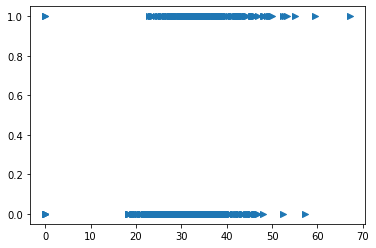

In [61]:
import matplotlib.pyplot as plt

plt.scatter(X,y, marker='>')

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression() 
model.fit(X, y)

LogisticRegression()

# Visualise the Model

Let's see how the model predicts for each of our input observations by visualising the predictions. 



In [63]:
y_pred = model.predict(X)

<Figure size 432x288 with 0 Axes>

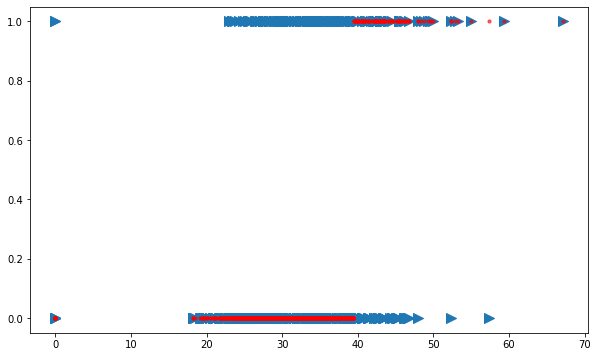

In [64]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(X,y, marker='>', s=100)
plt.scatter(X, y_pred, color='red', marker='o', s=10, alpha=0.6)

The chart shows that our algorithm has determined that if a patient's BMI is greater than 39, then for sure, they've got diabetes. 

I didn't realise you could have a BMI this large!

You can also see from the chart that there are plenty of observations with BMI larger than this where the patient doesn't have Diabetes, so BMI alone probably isn't the full story. 

For now, we'll stick to just analysing BMI, but this time we'll train our model using a train, test split, and try to determine the accuracy of our model.

# Train - Test Split

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

model = LogisticRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test) # The accuracy

0.6233766233766234

As you can see, our model accuracy is 62%. 

But how is this calculated? Different models score accuracy in different ways. In the case of Linear Regression, we used the Residual Sum of Squares (RSS) to determine the accuracy. 

To understand accuracy in terms of a Logistic Regression classifier, we need to start by understanding a Confusion Matrix.

# Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[128,  16],
       [ 71,  16]])

Let's make our confusion matrix look a bit nicer, with a Seaborn heatmap.

Text(0.5, 33.0, 'Predicted Values')

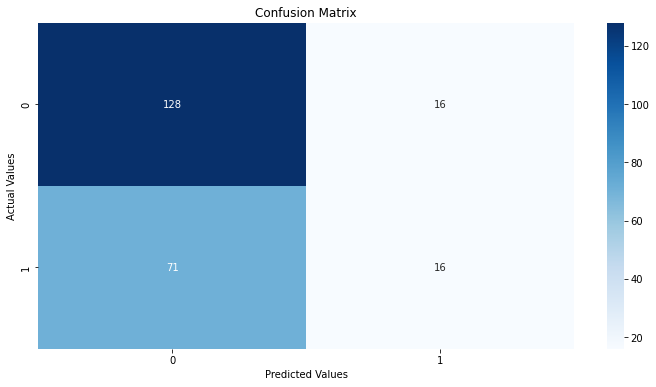

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# plotting the confusion matrix
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

### A Confusion Matrix works like this: 

In the top left we have coordinates actual=0, predicted=0.
* The actual value was 0, and we predicted 0. 
* This happened 131 times
* This is known as a **True Negative**. (We predicted Negative correctly)

In the top right we have coordinates actual=0, predicted=1
* The actual value was 0, but we predicted 1
* This happened 13 times
* This is known as a **False Negative**. (We predicted Negative incorrectly).
* A False Negative is also known as **Type 2 Error**

In the bottom left we have coordinates actual=1, predicted=0
* The actual value was 1, but we predicted 0
* This happened 48 times
* This is known as a **False Positive**. (We predicted Positive incorrectly).
* A False Positive is also known as a **Type 1 Error**

In the bottom right we have coordinates actual=1, predicted=1
* The actual value was 1, and we predicted 1
* This happened 39 times
* This is known as a **True Positive**. (We predicted Positive correctly).

![Confusion Matrix](../../Images/confusion-matrix.jpeg)

Although I prefer this example from [Answer Miner](https://www.answerminer.com/blog/confusion-matrix-explained)

![Confusion Matrix - Preganancy Example](../../images/confusion_matrix_pregnant.jpeg)





# Evaluating Performance

The following metrics are widely used when predicting model performance.

### Accuracy

The accuracy is defined as the ratio between the number of correct predictions and the total number of predictions.

$$ accuracy = \frac{TP + TN}{TP + FP + TN + FN}$$

This can also be represented as:

$$ accuracy = \frac{correct \space predictions}{total \space observations} $$

### Precision - the percentage of positive predictions that were correct

For each class it is defined as the ratio of true positives to the sum of true positives and false negatives i.e. the ratio between observations correctly predicted to be positive and the sum of the observations that were correctly identified as positive plus those incorrectly identified as positive. 

$$ precision = \frac{TP}{TP + FP}$$


### Recall

**The percentage of positive cases we managed to catch**

Recall is the ability of a classifier to find all positive instances. Also known as Sensitivity or the True Positive rate.

This is the ratio between observations correctly predicted to be positive and the sum of the observations that were correctly identified as positive plus those incorrectly identified as negative. 

$$ recall = \frac{TP}{TP + FN}$$

### Specificity - the percentage of negative chases we managed to catch

Also known as True Negative Rate.

This is the ratio between observations correctly predicted to be negative and the sum of the observations that were correctly identified as negative plus those incorrectly identified as positive. 

$$ specificity = \frac{TN}{TN + FP}$$



### F1 Score - the percentage of positive predictions that were correct

$$ f1 score = 2 \times\frac{precision \times recall }{precision + recall}$$


For more information see this Wikipedia page on [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
Aslo check out this *Towards Data Science* Tutorial on [Understanding the Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

# Performance Metrics for our Diabetes Model

In [71]:
from sklearn import metrics 

print(f"Accuracy for test set is {metrics.accuracy_score(y_test, y_pred):0.4f}.")
print(f"Precision for test set is {metrics.precision_score(y_test, y_pred):0.4f}.")
print(f"Recall for test set is {metrics.recall_score(y_test, y_pred):0.4f}.")
print(f"F1 Score for test set is {metrics.f1_score(y_test, y_pred):0.4f}.")


Accuracy for test set is 0.6234.
Precision for test set is 0.5000.
Recall for test set is 0.1839.
F1 Score for test set is 0.2689.


Alternatively you can get use the inbuilt classification report.

In [72]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.89      0.75       144
           1       0.50      0.18      0.27        87

    accuracy                           0.62       231
   macro avg       0.57      0.54      0.51       231
weighted avg       0.59      0.62      0.57       231



# ROC Curves

Another evaluation technique we can use for this then is the Receiver Operating Characteristic (ROC) curve which is seen in a lot of Machine Learning Contexts. 

This is used to plot the true positive rate against the false positive rate, showing the tradeoff between sensitivity and specificity.

Within this plot the ideal is the purple line with the result from a purely random model is the red line, the aim being as close to the purple line as possible.



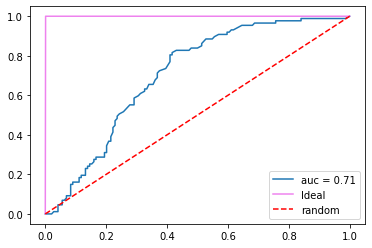

In [70]:
# ROC curve

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="auc = " + str(round(auc,2)))
x_ideal = (0, 0.001, 1)
y_ideal = (0, 1, 1)
plt.plot(x_ideal, y_ideal, color = "violet", label = "Ideal")
plt.plot([0,1], [0,1], color = "red", linestyle = "--",
          label = "random")
plt.legend(loc=4)
plt.show()

The performance of this is quantified by the Area Under the Curve (AUC) which shows how close the model is to the ideal performance. 

The “best” AUC score for the ideal model would be 1 where our random model has an AUC of 0.5. We can thus see our model performs relatively well although not perfect.
